### A. **Understanding Linear Regression**

**1. What is Linear Regression?**
   - Linear regression predicts a continuous outcome (dependent variable) based on one or more predictors (independent variables).
   - The simplest form is **simple linear regression**, where there is only one independent variable.
   - **Multiple linear regression** involves multiple predictors.

Simple Linear Regression: Involves one independent variable. The relationship is modeled using the equation:

𝑌=
𝛽
0
+
𝛽
1
𝑋
+
𝜖
<br>
Y=β 
0
​
 +β 
1
​
 X+ϵ 
 <br>
where:

𝑌
Y is the dependent variable.
𝑋
X is the independent variable.
𝛽
0
β 
0
​
  is the intercept (the value of 
𝑌
Y when 
𝑋=
0
X=0).
𝛽
1
β 
1
​
  is the slope of the line (the change in 
𝑌
Y for a one-unit change in 
𝑋
X).
𝜖
ϵ is the error term, representing the difference between the observed and predicted values of 
𝑌
Y.
Multiple Linear Regression: Involves two or more independent variables. The relationship is modeled using the equation:

𝑌=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
⋯
+
𝛽
𝑛
𝑋
𝑛
+
𝜖
<br>
Y=β 
0
​
 +β 
1
​
 X 
1
​
 +β 
2
​
 X 
2
​
 +⋯+β 
n
​
 X 
n
​
 +ϵ<br>
where:

𝑋
1
,
𝑋
2
,
…
,
𝑋
𝑛
X 
1
​
 ,X 
2
​
 ,…,X 
n
​
  are the independent variables.
𝛽
1
,
𝛽
2
,
…
,
𝛽
𝑛
β 
1
​
 ,β 
2
​
 ,…,β 
n
​
  are the coefficients representing the impact of each independent variable on 
𝑌
Y.

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Load Dataset**

In [3]:
#Load your dataset using `pandas`:
data = pd.read_csv('Advertising.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Data Preprocessing**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Text(0.5, 1.0, 'Newspaper Spend')

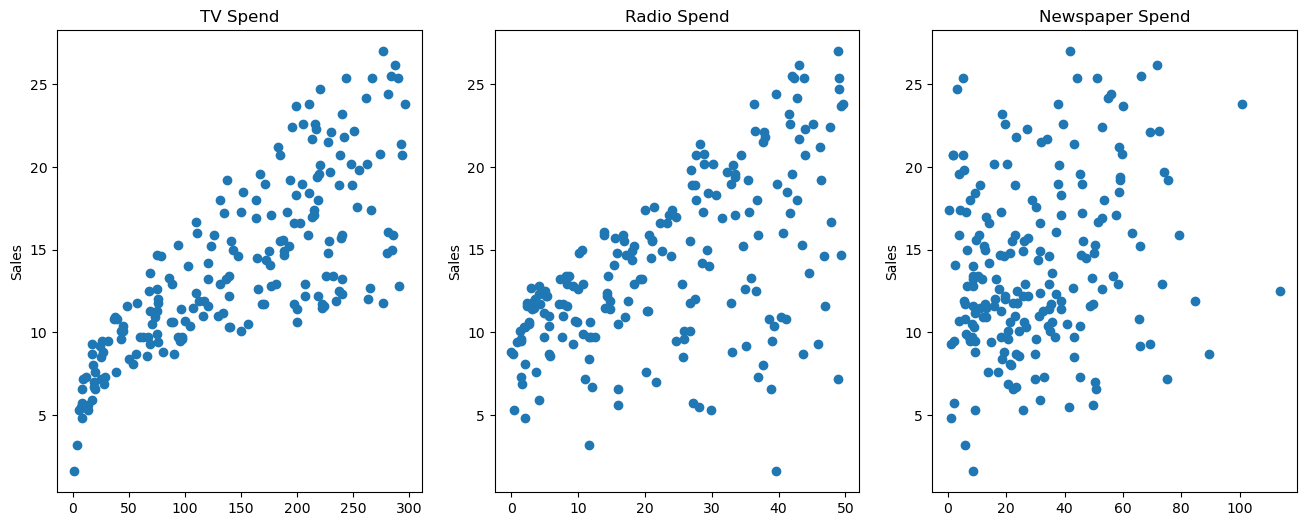

In [10]:
fig, axes =plt.subplots(nrows=1, ncols = 3, figsize = (16,6))
axes[0].plot(data['TV'],data['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(data['radio'],data['sales'],'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(data['newspaper'],data['sales'],'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


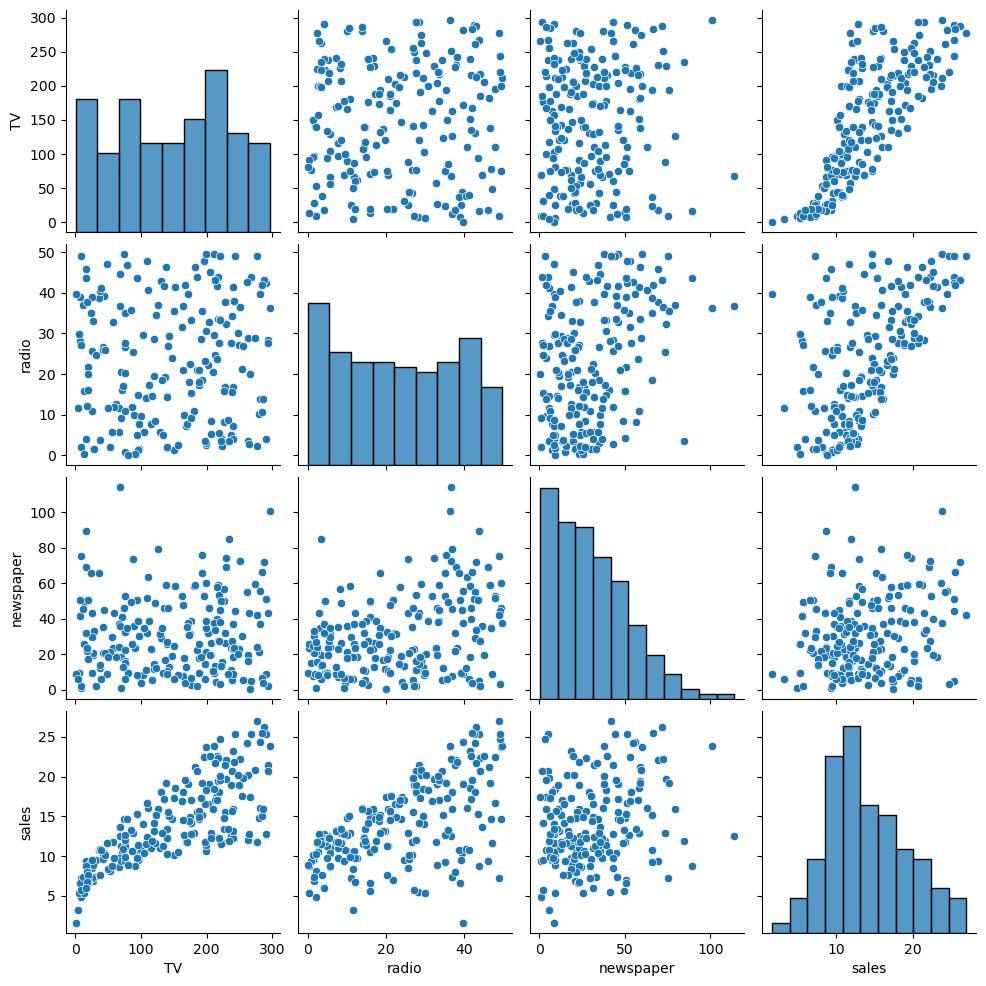

In [12]:
import seaborn as sns
sns.pairplot(data)

## **Statistical Approach:**

# Introducting 'statsmodels'

In [13]:
import statsmodels.api as sm

In [14]:
import statsmodels.formula.api as smf

In [15]:
est = smf.ols( formula = 'sales ~ TV + radio + newspaper', data = data).fit()

In [17]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           1.58e-96
Time:                        16:55:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Split Data**

In [23]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [24]:
#Split the dataset into training and testing sets:

X = data[['TV', 'radio', 'newspaper']]  # Independent variables
y = data['sales']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train the Model**
   - Fit the linear regression model:
     

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**6. Make Predictions**
   - Predict on the test set:
    
    

In [26]:
 y_pred = model.predict(X_test)

**Evaluate the Model**
   - Calculate and interpret the key metrics:
    
    

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, RMSE: {rmse}, R^2: {r2}')

MSE: 3.1740973539761046, RMSE: 1.7815996615334502, R^2: 0.899438024100912


**Visualize Results**
   - Plot actual vs. predicted values:
    

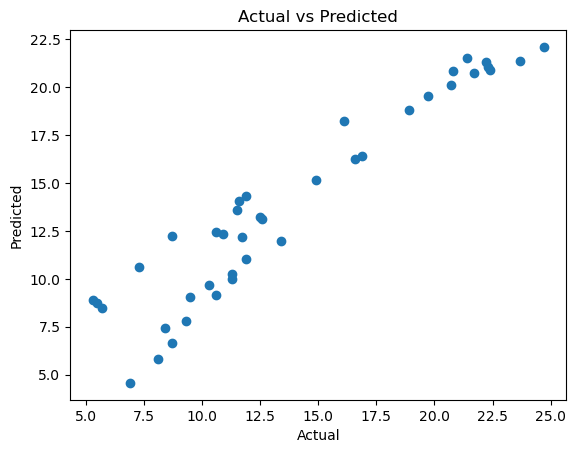

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [30]:
test_res = y_test - y_pred

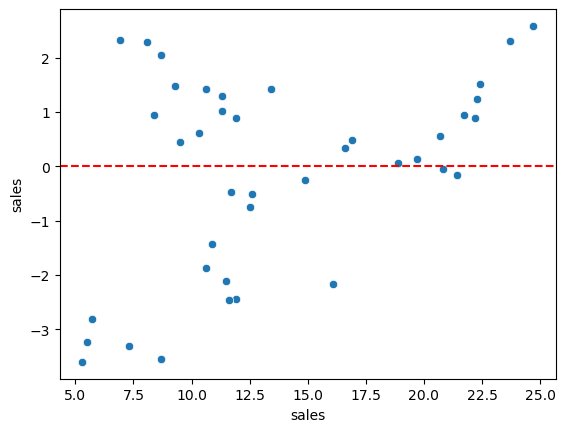

In [31]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


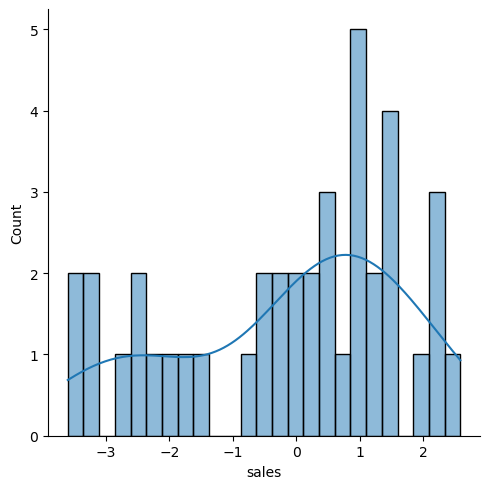

In [32]:
sns.displot(test_res,bins=25,kde=True)

Still unsure if normality is a reasonable approximation? We can check against the normal probability plot.

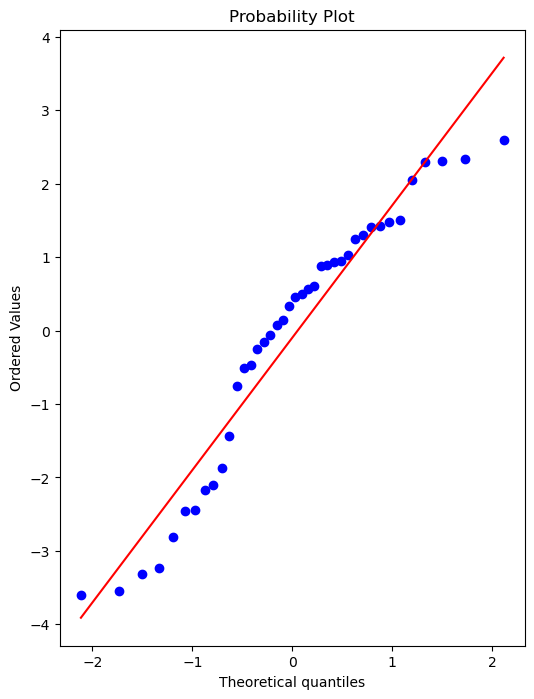

In [33]:
import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

## Retraining Model on Full Data

In [35]:
final_model = LinearRegression()

In [36]:
final_model.fit(X,y)

LinearRegression()

In [37]:
y_hat = final_model.predict(X)

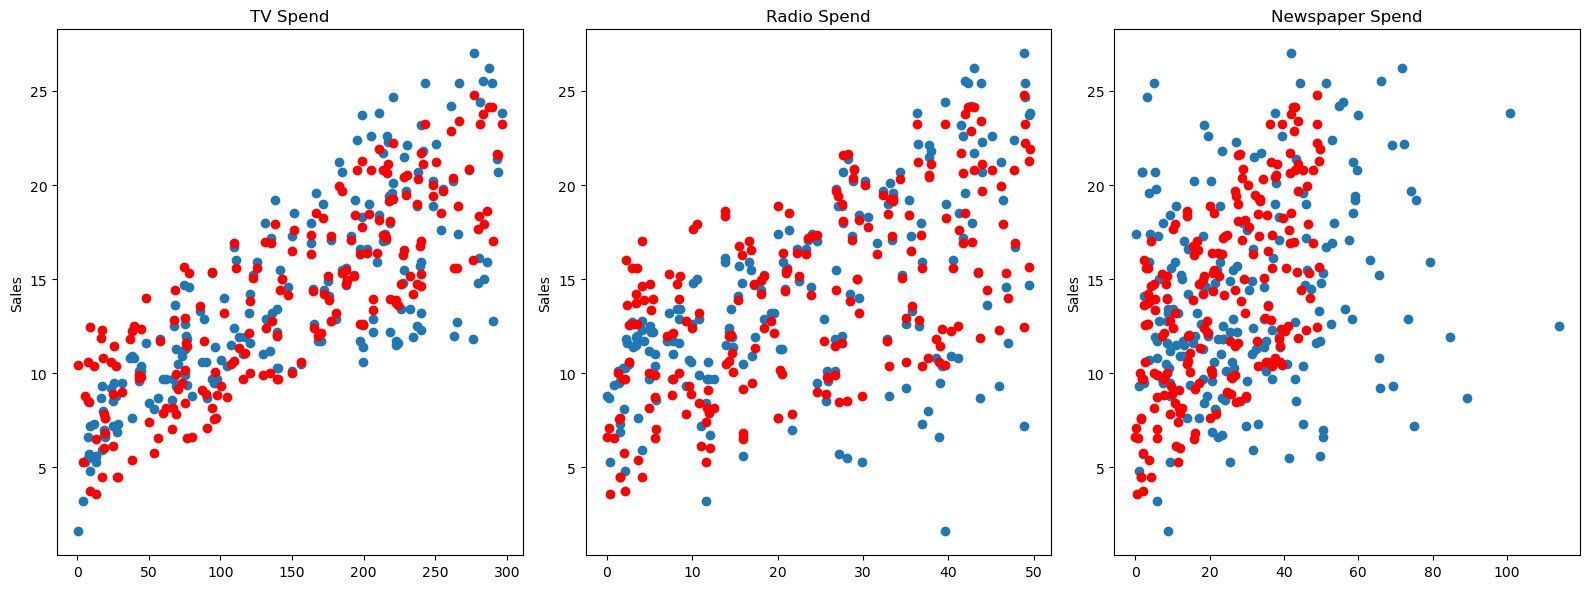

In [38]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(data['TV'],data['sales'],'o')
axes[0].plot(data['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(data['radio'],data['sales'],'o')
axes[1].plot(data['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(data['newspaper'],data['sales'],'o')
axes[2].plot(data['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

**residuals**

In [40]:
residuals = y_hat - y

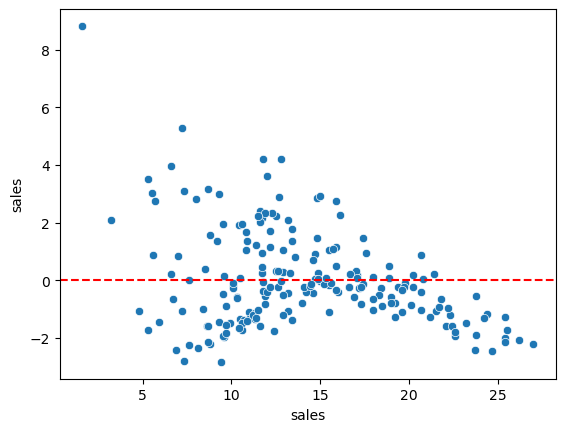

In [41]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

**coefficients:**

In [42]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [43]:
coef_df = pd.DataFrame(final_model.coef_, X.columns,columns=['Coefficient'])
coef_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Interpreting the coefficients:

* Holding all other features fixed, a 1 unit (1 USD) increase in TV Spend is associated with an average increase in sales of 0.045 units .

* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.

Develop by: <br>
Md. Sairul Islam <br>
linkdin : https://www.linkedin.com/in/sairulislam/ <br>
facebook : https://web.facebook.com/sahirul.islam.9<br>
github : https://github.com/sahirul70<br>
portfolio : https://sahirul70.github.io/sairul/
